<a href="https://colab.research.google.com/github/Advika007/ADR-Taskphase/blob/ML-CODES/Diabetes_prediction_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

LOADING THE DIABETES DATASET TO A PANDAS DATAFRAME

In [22]:
data= pd.read_csv("/content/diabetes.csv")
data.shape

(768, 9)

PRINT FIRST 5 ROWS OF THE DATA

In [23]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Calculating number of diabetic patients and non diabetic patients

In [24]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0--> NON DIABETIC
1--> DIABETIC

In [25]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


CHECK IF ANY NULL VALUE IS PRESENT

In [26]:
data.isnull().values.any()

False

Statistical description of Data

In [27]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Correlation

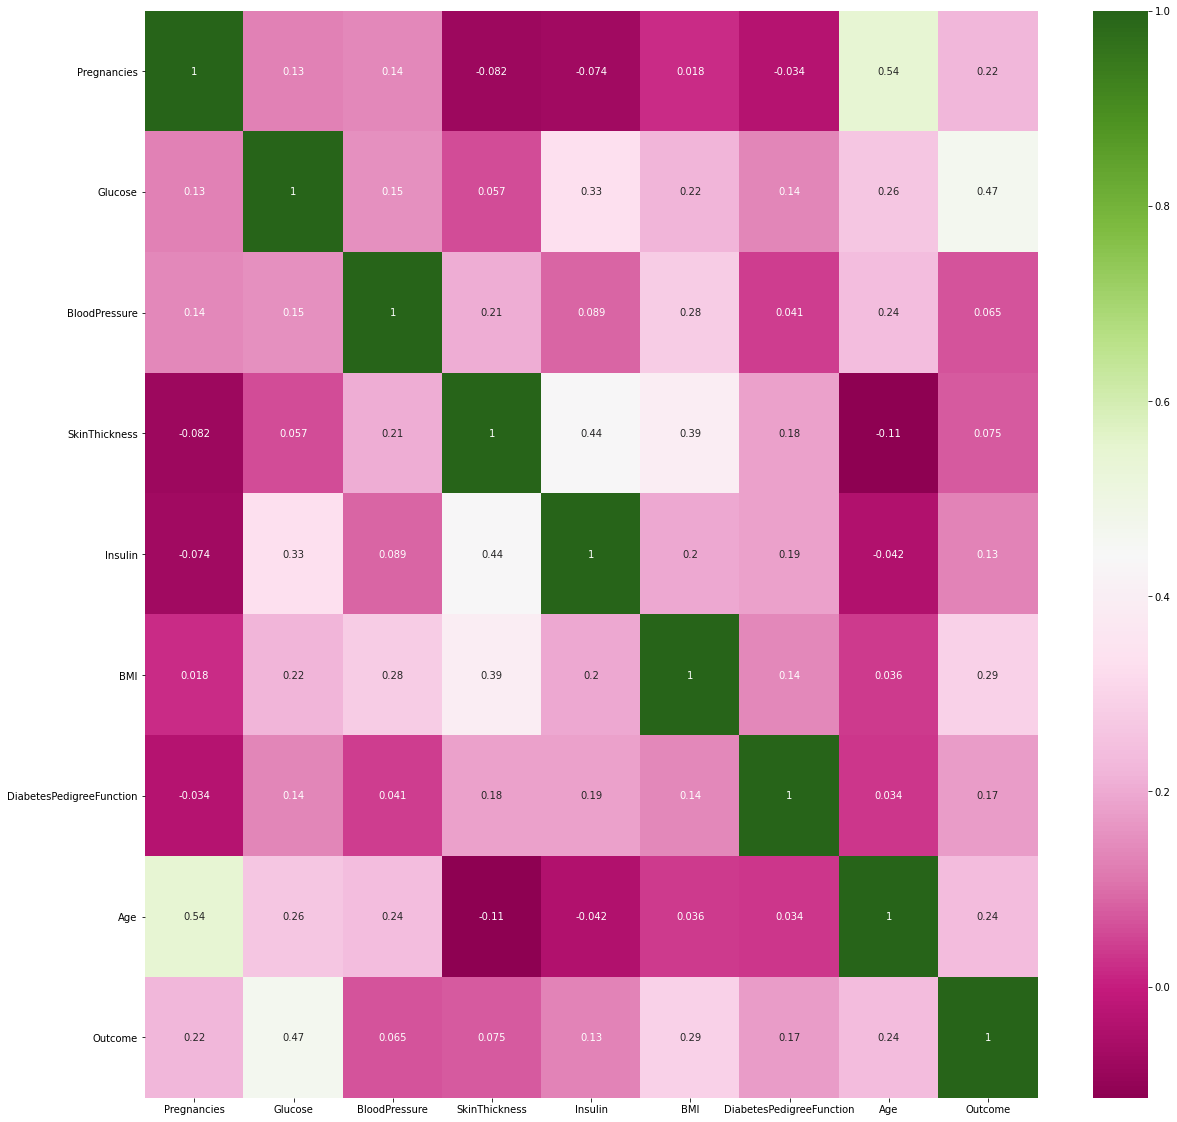

In [28]:
cordata= data.corr()
top_corr_features = cordata.index
plt.figure(figsize= (20,20))
g= sns.heatmap(data[top_corr_features].corr(),annot = True, cmap= "PiYG")

DEFINING LABELS AND DATA

In [29]:
X=data.drop(columns= 'Outcome', axis=1)
Y=data['Outcome']
print(X)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [30]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


DATA STANDARDIZATION

In [31]:
scaler = StandardScaler()

scaler.fit(X)

standdata = scaler.transform(X)
print(standdata)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [32]:
X= standdata
Y= data['Outcome']

In [33]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


Train Test Split


In [34]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3,stratify=Y,random_state=3)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (537, 8) (231, 8)


TRAINING THE MODEL

In [36]:
classifier = svm.SVC(kernel= 'linear')
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

ACCURACY SCORE

In [37]:
#for training data
X_train_prediction= classifier.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction,Y_train)

In [38]:
print('Accuracy score for training data:', training_data_accuracy)

Accuracy score for training data: 0.7802607076350093


In [39]:
#for test data
X_test_prediction= classifier.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction,Y_test)

In [40]:
print('Accuracy score for test data:', test_data_accuracy)

Accuracy score for test data: 0.7619047619047619


PREDICTING THE INPUT DATA

In [44]:
input_data= (5,166,72,19,175,25.8,0.587,51)

#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for only one data set
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction= classifier.predict(std_data)
print(prediction)

if (prediction[0]== 0):
  print("The person is not diabetic")
else:
  print("The person is diabetic")

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic
